#UE 3.1 - TP1 - PRINCIPES D'UNE IMAGE NUMERIQUE

In [1]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from PIL import Image
from io import BytesIO

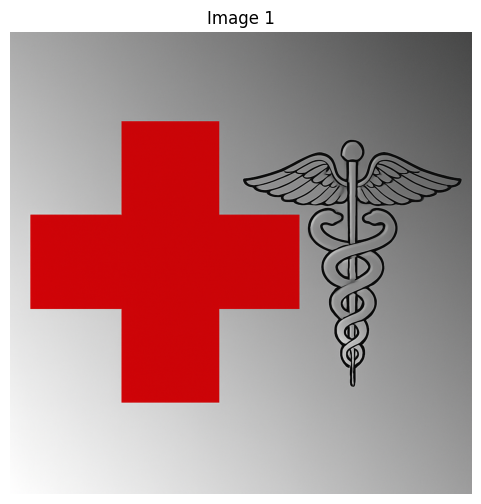

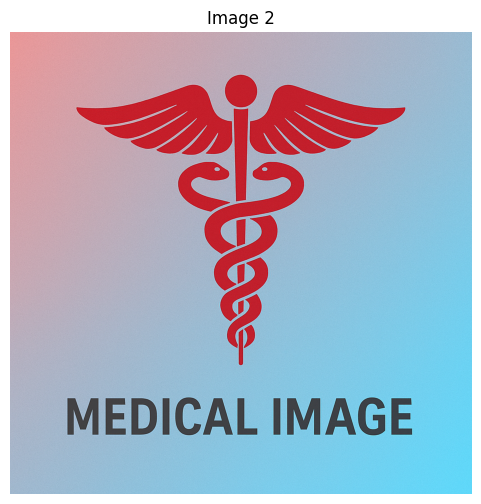

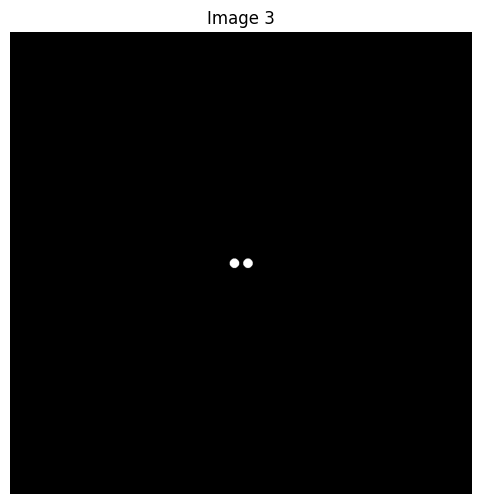

In [5]:
#Chargement des images originales (matrice image : 1024 x 1024)
img1 = Image.open('image_test1_tp1.png')
img2 = Image.open('image_test2_tp1.png')
img3 = Image.open('image_test3_tp1.png')

plt.figure(figsize=(6,6))
plt.imshow(img1)
plt.title("Image 1")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img2)
plt.title("Image 2")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img3, cmap='gray')
plt.title("Image 3")
plt.axis('off')
plt.show()

#Echantillonnage

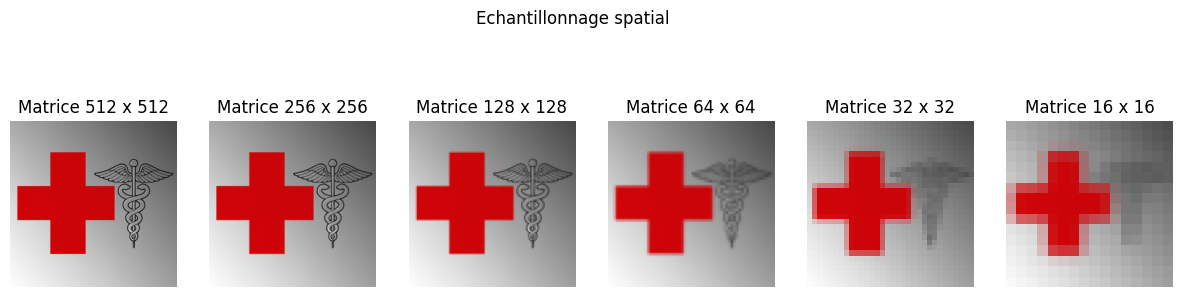

In [3]:
#Echantillonnage spatial (image 1)

sizes = [512, 256, 128, 64, 32, 16]
fig, axs = plt.subplots(1, len(sizes), figsize=(15,4))

for i, size in enumerate(sizes):
  resized = img1.resize((size, size), Image.BILINEAR)
  axs[i].imshow(resized)
  axs[i].set_title(f"Matrice {size} x {size}")
  axs[i].axis('off')

plt.suptitle("Echantillonnage spatial")
plt.show()

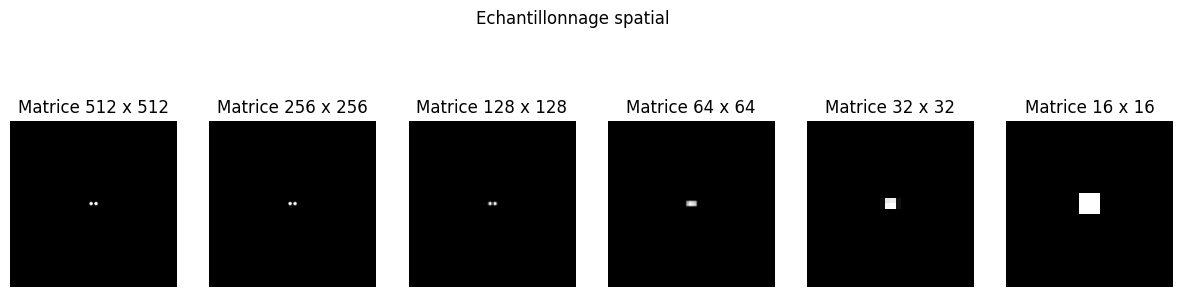

In [7]:
#Echantillonnage spatial (image 3)

sizes = [512, 256, 128, 64, 32, 16]
fig, axs = plt.subplots(1, len(sizes), figsize=(15,4))

for i, size in enumerate(sizes):
  resized = img3.resize((size, size), Image.BILINEAR)
  axs[i].imshow(resized, cmap='gray')
  axs[i].set_title(f"Matrice {size} x {size}")
  axs[i].axis('off')

plt.suptitle("Echantillonnage spatial")
plt.show()

#Quantification

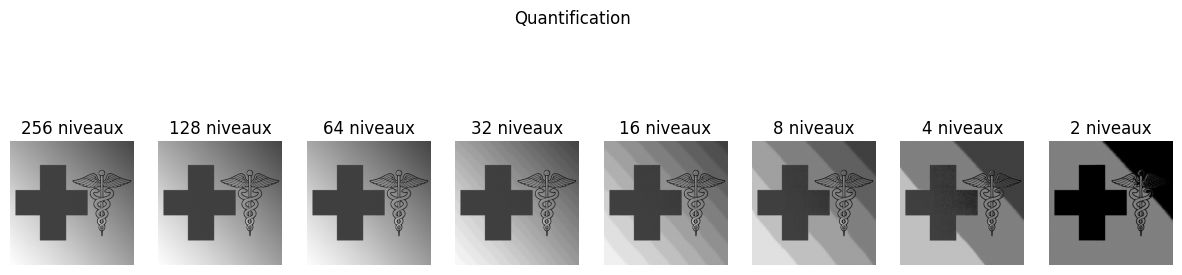

In [8]:
#Quantification
gray_img1 = img1.convert("L")
gray_img2 = img2.convert("L")

levels = [256, 128, 64, 32, 16, 8, 4, 2]
fig, axs = plt.subplots(1, len(levels), figsize=(15,4))

for i, level in enumerate(levels):
  array = np.array(gray_img1)
  quantized = (array // (256 // level)) * (256 // level)
  axs[i].imshow(quantized, cmap='gray', vmin=0, vmax=255)
  axs[i].set_title(f"{level} niveaux")
  axs[i].axis('off')

plt.suptitle("Quantification")
plt.show()

#Codage RVB - Séparation des canaux

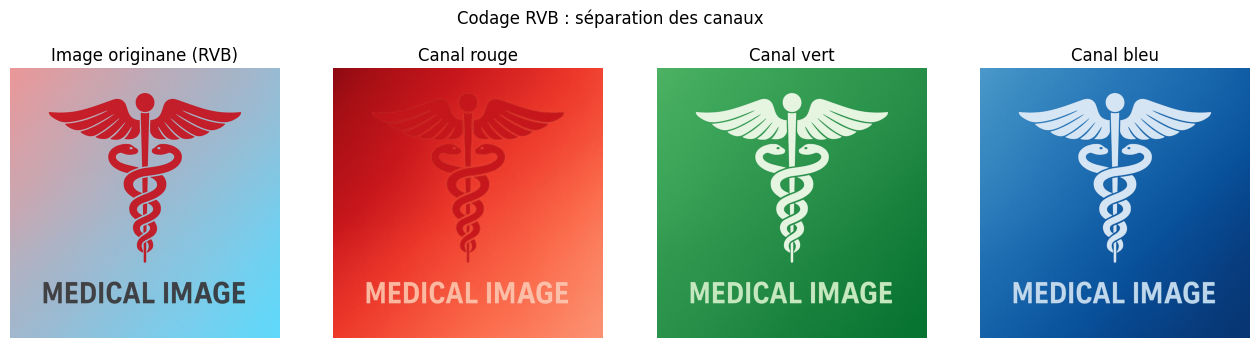

In [ ]:
#Séparation des canaux
r, g, b = img2.split()

fig, axs = plt.subplots(1, 4, figsize=(16,4))
axs[0].imshow(img2)
axs[0].set_title("Image originane (RVB)")
axs[1].imshow(r, cmap='Reds')
axs[1].set_title("Canal rouge")
axs[2].imshow(g, cmap='Greens')
axs[2].set_title("Canal vert")
axs[3].imshow(b, cmap='Blues')
axs[3].set_title("Canal bleu")

for ax in axs:
  ax.axis('off')

plt.suptitle("Codage RVB : séparation des canaux")
plt.show()

#Codage en niveaux de gris

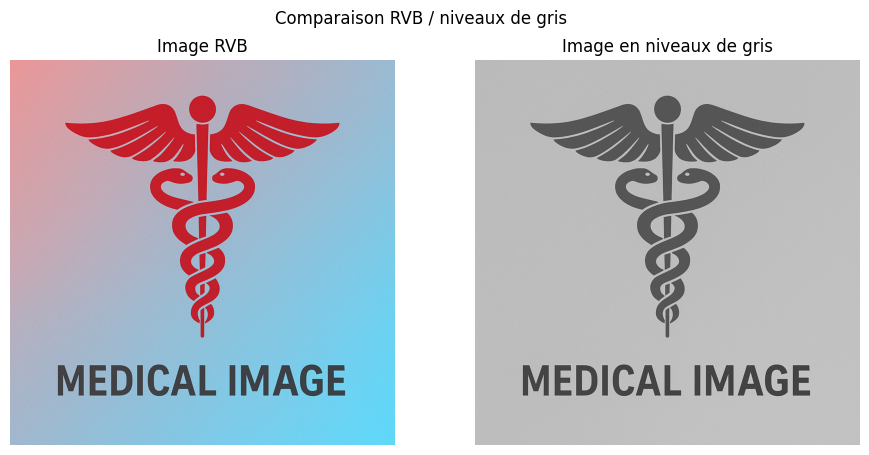

In [ ]:
#Comparaison RVB / niveaux de gris
fig, axs = plt.subplots(1, 2, figsize=(11,5))
axs[0].imshow(img2)
axs[0].set_title("Image RVB")
axs[1].imshow(gray_img2, cmap='gray')
axs[1].set_title("Image en niveaux de gris")

for ax in axs:
  ax.axis('off')

plt.suptitle("Comparaison RVB / niveaux de gris")
plt.show()

#Compression

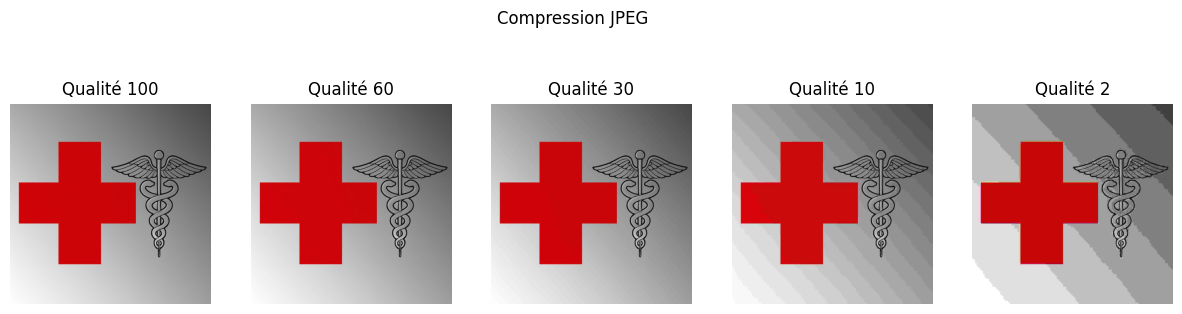

In [ ]:
#Compression de l'image
qualities = [100, 60, 30, 10, 2]
fig, axs = plt.subplots(1, len(qualities), figsize=(15,4))

for i, q in enumerate(qualities):
  buffer = BytesIO()
  img1.save(buffer, format='JPEG', quality=q)
  buffer.seek(0)
  compressed_img = Image.open(buffer)
  axs[i].imshow(compressed_img)
  axs[i].set_title(f"Qualité {q}")
  axs[i].axis('off')

plt.suptitle("Compression JPEG")
plt.show()